导入文件

In [1]:
import pandas as pd
import numpy as np
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from sklearn.ensemble import RandomForestRegressor

font_set = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=15)

读取文件

In [2]:
data_train = pd.read_csv('C:/Users/85778/Desktop/caggle/titanic/dataset/train.csv')
data_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [3]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


可以看出有缺省数据，接下来通过绘图进行数据与生还结果的相关性分析

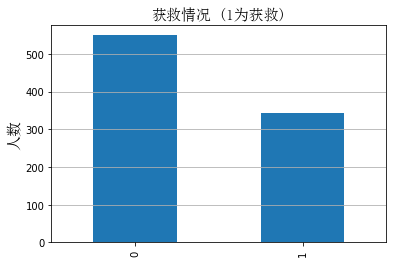

In [4]:
fig = plt.figure()
fig.set(alpha=0.9)  # 设定图表颜色alpha参数

fig.set(alpha=0.1)  # 设定图表颜色alpha参数
data_train.Survived.value_counts().plot(kind='bar')# 柱状图 

plt.grid(axis="y") 
plt.title(u"获救情况 (1为获救)",fontproperties=font_set) # 标题
plt.ylabel(u"人数",fontproperties=font_set)
plt.show()

可以看出获救人数还是占比较小

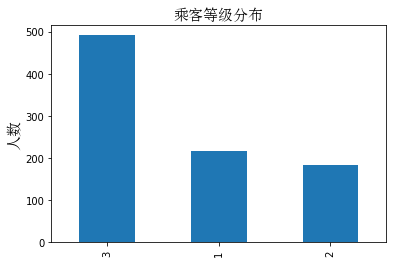

In [5]:
data_train.Pclass.value_counts().plot(kind="bar")
plt.ylabel(u"人数",fontproperties=font_set)
plt.title(u"乘客等级分布",fontproperties=font_set)
plt.show()

根据成员坐席等级区分人数

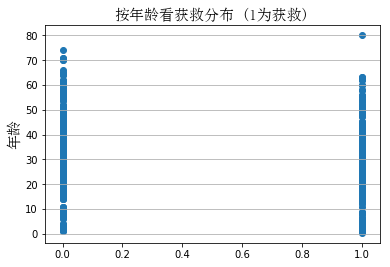

In [6]:
plt.scatter(data_train.Survived, data_train.Age)
plt.ylabel(u"年龄",fontproperties=font_set)                         # 设定纵坐标名称
plt.grid(b=True, which='major', axis='y') 
plt.title(u"按年龄看获救分布 (1为获救)",fontproperties=font_set)
plt.show()

按照获救与为获救人数中的年龄分布密度,发现各年龄分布相差不大

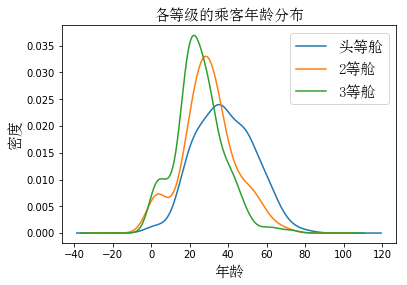

In [7]:
data_train.Age[data_train.Pclass == 1].plot(kind='kde')   
data_train.Age[data_train.Pclass == 2].plot(kind='kde')
data_train.Age[data_train.Pclass == 3].plot(kind='kde')
plt.xlabel(u"年龄",fontproperties=font_set)# plots an axis lable
plt.ylabel(u"密度",fontproperties=font_set) 
plt.title(u"各等级的乘客年龄分布",fontproperties=font_set)
plt.legend((u'头等舱', u'2等舱',u'3等舱'),loc='best',prop=font_set) # sets our legend for our graph.
plt.show()

各等级的年龄分布

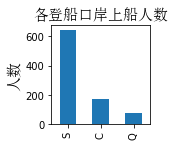

In [8]:
plt.subplot2grid((2,3),(1,2))
data_train.Embarked.value_counts().plot(kind='bar')
plt.title(u"各登船口岸上船人数",fontproperties=font_set)
plt.ylabel(u"人数",fontproperties=font_set)  
plt.show()

各登船口上船的人数

<Figure size 432x288 with 0 Axes>

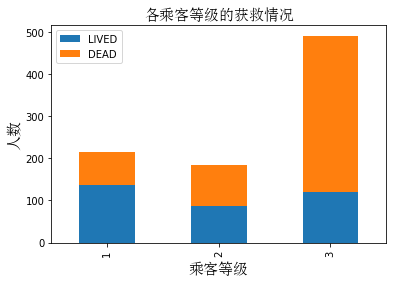

In [9]:
fig = plt.figure()
fig.set(alpha=0.5)  # 设定图表颜色alpha参数

Survived_0 = data_train.Pclass[data_train.Survived == 0].value_counts()
Survived_1 = data_train.Pclass[data_train.Survived == 1].value_counts()
df=pd.DataFrame({u'LIVED':Survived_1, u'DEAD':Survived_0})
df.plot(kind='bar', stacked=True)
plt.title(u"各乘客等级的获救情况",fontproperties=font_set)
plt.xlabel(u"乘客等级",fontproperties=font_set) 
plt.ylabel(u"人数",fontproperties=font_set) 
plt.show()

可以看出等级越高（3<2<1），死亡率越低

<Figure size 432x288 with 0 Axes>

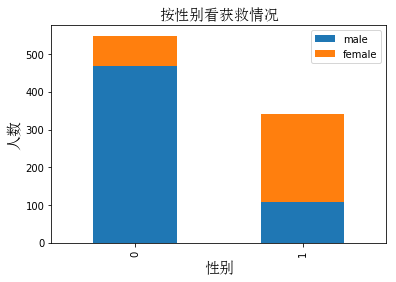

In [10]:
#看看各性别的获救情况
fig = plt.figure()
fig.set(alpha=0.2)  # 设定图表颜色alpha参数

Survived_m = data_train.Survived[data_train.Sex == 'male'].value_counts()
Survived_f = data_train.Survived[data_train.Sex == 'female'].value_counts()
df=pd.DataFrame({u'male':Survived_m,u'female':Survived_f})
df.plot(kind='bar', stacked=True)
plt.title(u"按性别看获救情况",fontproperties=font_set)
plt.xlabel(u"性别",fontproperties=font_set) 
plt.ylabel(u"人数",fontproperties=font_set)
plt.show()

可以看出性别是影响救援的因素之一

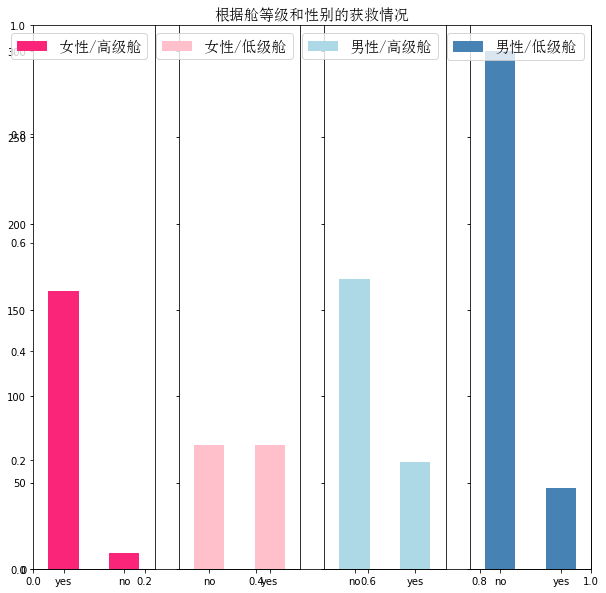

In [11]:
fig=plt.figure(figsize=(10,10))
fig.set(alpha=0.65) # 设置图像透明度，无所谓
plt.title(u"根据舱等级和性别的获救情况",fontproperties=font_set)

ax1=fig.add_subplot(141)
data_train.Survived[data_train.Sex == 'female'][data_train.Pclass != 3].value_counts().plot(kind='bar', label="female highclass", color='#FA2479')
ax1.set_xticklabels([u"yes", u"no"], rotation=0)
ax1.legend([u"女性/高级舱"], loc='best',prop=font_set)

ax2=fig.add_subplot(142, sharey=ax1)
data_train.Survived[data_train.Sex == 'female'][data_train.Pclass == 3].value_counts().plot(kind='bar', label='female, low class', color='pink')
ax2.set_xticklabels([u"no", u"yes"], rotation=0)
plt.legend([u"女性/低级舱"], loc='best',prop=font_set)

ax3=fig.add_subplot(143, sharey=ax1)
data_train.Survived[data_train.Sex == 'male'][data_train.Pclass != 3].value_counts().plot(kind='bar', label='male, high class',color='lightblue')
ax3.set_xticklabels([u"no", u"yes"], rotation=0)
plt.legend([u"男性/高级舱"], loc='best',prop=font_set)

ax4=fig.add_subplot(144, sharey=ax1)
data_train.Survived[data_train.Sex == 'male'][data_train.Pclass == 3].value_counts().plot(kind='bar', label='male low class', color='steelblue')
ax4.set_xticklabels([u"no", u"yes"], rotation=0)
plt.legend([u"男性/低级舱"], loc='best',prop=font_set)

plt.show()

根据舱等级和性别的获救情况

<Figure size 576x576 with 0 Axes>

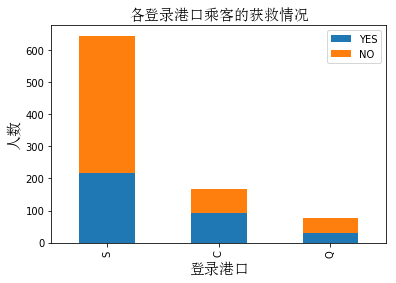

In [12]:
fig = plt.figure(figsize=(8,8))
fig.set(alpha=0.2)  # 设定图表颜色alpha参数

Survived_0 = data_train.Embarked[data_train.Survived == 0].value_counts()
Survived_1 = data_train.Embarked[data_train.Survived == 1].value_counts()
df=pd.DataFrame({u'YES':Survived_1, u'NO':Survived_0})
df.plot(kind='bar', stacked=True)
plt.title(u"各登录港口乘客的获救情况",fontproperties=font_set)
plt.xlabel(u"登录港口",fontproperties=font_set) 
plt.ylabel(u"人数",fontproperties=font_set) 
plt.show()

各登录港口乘客的获救情况

In [13]:
g = data_train.groupby(['Parch','Survived'])
df = pd.DataFrame(g.count()['PassengerId'])
print (df)

g = data_train.groupby(['SibSp','Survived'])
df = pd.DataFrame(g.count()['PassengerId'])
print (df)

                PassengerId
Parch Survived             
0     0                 445
      1                 233
1     0                  53
      1                  65
2     0                  40
      1                  40
3     0                   2
      1                   3
4     0                   4
5     0                   4
      1                   1
6     0                   1
                PassengerId
SibSp Survived             
0     0                 398
      1                 210
1     0                  97
      1                 112
2     0                  15
      1                  13
3     0                  12
      1                   4
4     0                  15
      1                   3
5     0                   5
8     0                   7


有无表亲或父母小孩

In [14]:
data_train.Cabin.value_counts()

C23 C25 C27    4
B96 B98        4
G6             4
E101           3
F2             3
C22 C26        3
F33            3
D              3
E44            2
C83            2
C78            2
B51 B53 B55    2
C52            2
D35            2
C2             2
B35            2
B58 B60        2
C126           2
D20            2
D26            2
C124           2
E25            2
D17            2
C65            2
B5             2
E24            2
B77            2
B18            2
B20            2
E8             2
              ..
A31            1
B4             1
B38            1
B30            1
B39            1
A36            1
A5             1
E68            1
C90            1
B50            1
D47            1
C54            1
B80            1
E12            1
C86            1
D7             1
D15            1
E58            1
E40            1
F38            1
E77            1
C104           1
C30            1
F G63          1
C110           1
D48            1
E50            1
D9            

<Figure size 432x288 with 0 Axes>

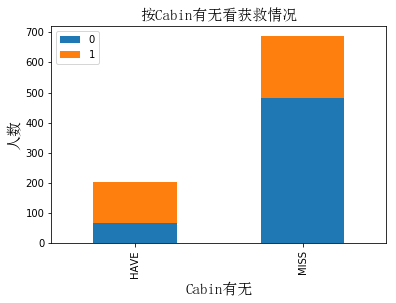

In [15]:
fig = plt.figure()
fig.set(alpha=0.2)  # 设定图表颜色alpha参数

Survived_cabin = data_train.Survived[pd.notnull(data_train.Cabin)].value_counts()
Survived_nocabin = data_train.Survived[pd.isnull(data_train.Cabin)].value_counts()
df=pd.DataFrame({u'HAVE':Survived_cabin, u'MISS':Survived_nocabin}).transpose()
df.plot(kind='bar', stacked=True)
plt.title(u"按Cabin有无看获救情况",fontproperties=font_set)
plt.xlabel(u"Cabin有无",fontproperties=font_set) 
plt.ylabel(u"人数",fontproperties=font_set)
plt.show()

NameError: name 'data_tset' is not defined

In [19]:
data_test = pd.read_csv('C:/Users/85778/Desktop/caggle/titanic/dataset/test.csv')

In [21]:
nas = pd.concat([data_train.isnull().sum(), data_test.isnull().sum()], axis=1, keys=['Train Dataset', 'Test Dataset']) 
print('Nan in the data sets')
print(nas[nas.sum(axis=1) > 0])

Nan in the data sets
          Train Dataset  Test Dataset
Age                 177          86.0
Cabin               687         327.0
Embarked              2           0.0
Fare                  0           1.0


D:\Professional\Anaconda3\envs\py3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [23]:
# Class vs Survived
print(data_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False))

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


In [25]:
# sex vs Survived
print(data_train[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False))

      Sex  Survived
0  female  0.742038
1    male  0.188908


In [27]:
print(data_train[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False))

   SibSp  Survived
1      1  0.535885
2      2  0.464286
0      0  0.345395
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000


In [29]:
# Parch vs Survived
#Parent = mother, father
#Child = daughter, son, stepdaughter, stepson
#Some children travelled only with a nanny, therefore parch=0 for them.
print(data_train[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False))

   Parch  Survived
3      3  0.600000
1      1  0.550847
2      2  0.500000
0      0  0.343658
5      5  0.200000
4      4  0.000000
6      6  0.000000


In [33]:
data_train['Family_Size']=data_train['SibSp']+data_train['Parch']+1
data_train['Family']=data_train['SibSp']*data_train['Parch']

In [56]:
data_test['Family_Size']=data_test['SibSp']+data_test['Parch']+1
data_test['Family']=data_test['SibSp']*data_test['Parch']

In [ ]:
kaishichuli

In [31]:
print(data_train[["Family", "Survived"]].groupby(['Family'], as_index=False).mean().sort_values(by='Survived', ascending=False))

   Family  Survived
2       2  0.692308
1       1  0.596491
0       0  0.373832
5       5  0.333333
6       6  0.333333
7       8  0.333333
4       4  0.125000
3       3  0.100000
8      10  0.000000
9      16  0.000000


In [34]:
print(data_train[["Family_Size", "Survived"]].groupby(['Family_Size'], as_index=False).mean().sort_values(by='Survived', ascending=False))

   Family_Size  Survived
3            4  0.724138
2            3  0.578431
1            2  0.552795
6            7  0.333333
0            1  0.303538
4            5  0.200000
5            6  0.136364
7            8  0.000000
8           11  0.000000


In [38]:
data_train['IsAlone'] = 0
data_train.loc[data_train['Family_Size'] == 1, 'IsAlone'] = 1

In [58]:
data_test['IsAlone'] = 0
data_test.loc[data_test['Family_Size'] == 1, 'IsAlone'] = 1

In [59]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 14 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
Family_Size    418 non-null int64
Family         418 non-null int64
IsAlone        418 non-null int64
dtypes: float64(2), int64(7), object(5)
memory usage: 45.8+ KB


In [41]:
data_train['Title'] = data_train.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

In [42]:
data_train['Title'] = data_train['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
data_train['Title'] = data_train['Title'].replace('Mlle', 'Miss')
data_train['Title'] = data_train['Title'].replace('Ms', 'Miss')
data_train['Title'] = data_train['Title'].replace('Mme', 'Mrs')

In [60]:
data_test['Title'] = data_test.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

In [61]:
data_test['Title'] = data_test['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
data_test['Title'] = data_test['Title'].replace('Mlle', 'Miss')
data_test['Title'] = data_test['Title'].replace('Ms', 'Miss')
data_test['Title'] = data_test['Title'].replace('Mme', 'Mrs')

In [46]:
print(data_train[["Title", "Survived"]].groupby(['Title'], as_index=False).mean().sort_values(by='Survived', ascending=False))

    Title  Survived
3     Mrs  0.793651
1    Miss  0.702703
0  Master  0.575000
4    Rare  0.347826
2      Mr  0.156673


In [48]:
data_train['FamilySizeGroup'] = 'Small'
data_train.loc[data_train['Family_Size'] == 1, 'FamilySizeGroup'] = 'Alone'
data_train.loc[data_train['Family_Size'] >= 5, 'FamilySizeGroup'] = 'Big'

In [62]:
data_test['FamilySizeGroup'] = 'Small'
data_test.loc[data_test['Family_Size'] == 1, 'FamilySizeGroup'] = 'Alone'
data_test.loc[data_test['Family_Size'] >= 5, 'FamilySizeGroup'] = 'Big'

In [63]:
data_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Family,IsAlone,Title,FamilySizeGroup
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1,0,1,Mr,Alone
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2,0,0,Mrs,Small
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1,0,1,Mr,Alone
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1,0,1,Mr,Alone
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,3,1,0,Mrs,Small
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S,1,0,1,Mr,Alone
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q,1,0,1,Miss,Alone
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S,3,1,0,Mr,Small
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C,1,0,1,Mrs,Alone
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S,3,0,0,Mr,Small


In [68]:
data_test.loc[ data_test['Age'] <= 14, 'Age'] = 0
data_test.loc[(data_test['Age'] > 14) & (data_test['Age'] <= 32), 'Age'] = 1
data_test.loc[(data_test['Age'] > 32) & (data_test['Age'] <= 48), 'Age'] = 2
data_test.loc[(data_test['Age'] > 48) & (data_test['Age'] <= 64), 'Age'] = 3
data_test.loc[ data_test['Age'] > 64, 'Age'] = 4

In [69]:
data_test['ChildandRich'] = 0
data_test.loc[(data_test['Age'] <= 0) & (data_test['Pclass'] == 1 ),'ChildandRich'] = 1  
data_test.loc[(data_test['Age'] <= 0) & (data_test['Pclass'] == 2 ),'ChildandRich'] = 1  

In [70]:
data_test.loc[ data_test['Fare'] <= 7.91, 'Fare'] = 0
data_test.loc[(data_test['Fare'] > 7.91) & (data_test['Fare'] <= 14.454), 'Fare'] = 1
data_test.loc[(data_test['Fare'] > 14.454) & (data_test['Fare'] <= 31), 'Fare']   = 2
data_test.loc[ data_test['Fare'] > 31, 'Fare'] = 3
data_test['Fare'] = data_test['Fare'].astype(int)

In [71]:
data_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Family,IsAlone,Title,FamilySizeGroup,ChildandRich
0,892,3,"Kelly, Mr. James",male,2.0,0,0,330911,0,No,Q,1,0,1,Mr,Alone,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,2.0,1,0,363272,0,No,S,2,0,0,Mrs,Small,0
2,894,2,"Myles, Mr. Thomas Francis",male,3.0,0,0,240276,1,No,Q,1,0,1,Mr,Alone,0
3,895,3,"Wirz, Mr. Albert",male,1.0,0,0,315154,1,No,S,1,0,1,Mr,Alone,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,1.0,1,1,3101298,1,No,S,3,1,0,Mrs,Small,0
5,897,3,"Svensson, Mr. Johan Cervin",male,0.0,0,0,7538,1,No,S,1,0,1,Mr,Alone,0
6,898,3,"Connolly, Miss. Kate",female,1.0,0,0,330972,0,No,Q,1,0,1,Miss,Alone,0
7,899,2,"Caldwell, Mr. Albert Francis",male,1.0,1,1,248738,2,No,S,3,1,0,Mr,Small,0
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,1.0,0,0,2657,0,No,C,1,0,1,Mrs,Alone,0
9,901,3,"Davies, Mr. John Samuel",male,1.0,2,0,A/4 48871,2,No,S,3,0,0,Mr,Small,0


In [72]:
dummies_Cabin1 = pd.get_dummies(data_test['Cabin'], prefix= 'Cabin')

dummies_Embarked1 = pd.get_dummies(data_test['Embarked'], prefix= 'Embarked')

dummies_Sex1 = pd.get_dummies(data_test['Sex'], prefix= 'Sex')

dummies_Pclass1 = pd.get_dummies(data_test['Pclass'], prefix= 'Pclass')

dummies_FamilySizeGroup1 = pd.get_dummies(data_test['FamilySizeGroup'], prefix= 'FamilySizeGroup')

dummies_Title1 = pd.get_dummies(data_test['Title'], prefix= 'Title')

df1 = pd.concat([data_test, dummies_Cabin1, dummies_Embarked1, dummies_Sex1, dummies_Pclass1,dummies_FamilySizeGroup1,dummies_Title1],axis=1)
df1.drop(['Pclass','Name', 'Sex', 'Ticket', 'Cabin', 'Embarked','FamilySizeGroup','Title'], axis=1, inplace=True)
###df.drop(['Pclass','Sex','Cabin', 'Embarked'], axis=1, inplace=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 27 columns):
PassengerId              418 non-null int64
Age                      418 non-null float64
SibSp                    418 non-null int64
Parch                    418 non-null int64
Fare                     418 non-null int32
Family_Size              418 non-null int64
Family                   418 non-null int64
IsAlone                  418 non-null int64
ChildandRich             418 non-null int64
Cabin_No                 418 non-null uint8
Cabin_Yes                418 non-null uint8
Embarked_C               418 non-null uint8
Embarked_Q               418 non-null uint8
Embarked_S               418 non-null uint8
Sex_female               418 non-null uint8
Sex_male                 418 non-null uint8
Pclass_1                 418 non-null uint8
Pclass_2                 418 non-null uint8
Pclass_3                 418 non-null uint8
FamilySizeGroup_Alone    418 non-null uint8
FamilySizeGro

In [51]:
data_train.loc[ data_train['Age'] <= 14, 'Age'] = 0
data_train.loc[(data_train['Age'] > 14) & (data_train['Age'] <= 32), 'Age'] = 1
data_train.loc[(data_train['Age'] > 32) & (data_train['Age'] <= 48), 'Age'] = 2
data_train.loc[(data_train['Age'] > 48) & (data_train['Age'] <= 64), 'Age'] = 3
data_train.loc[ data_train['Age'] > 64, 'Age'] = 4

data_train['ChildandRich'] = 0
data_train.loc[(data_train['Age'] <= 0) & (data_train['Pclass'] == 1 ),'ChildandRich'] = 1  
data_train.loc[(data_train['Age'] <= 0) & (data_train['Pclass'] == 2 ),'ChildandRich'] = 1  

In [53]:
data_train.loc[ data_train['Fare'] <= 7.91, 'Fare'] = 0
data_train.loc[(data_train['Fare'] > 7.91) & (data_train['Fare'] <= 14.454), 'Fare'] = 1
data_train.loc[(data_train['Fare'] > 14.454) & (data_train['Fare'] <= 31), 'Fare']   = 2
data_train.loc[ data_train['Fare'] > 31, 'Fare'] = 3
data_train['Fare'] = data_train['Fare'].astype(int)

In [54]:
data_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Family,IsAlone,Title,FamilySizeGroup,ChildandRich
0,1,0,3,"Braund, Mr. Owen Harris",male,1.0,1,0,A/5 21171,0,No,S,2,0,0,Mr,Small,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,2.0,1,0,PC 17599,3,Yes,C,2,0,0,Mrs,Small,0
2,3,1,3,"Heikkinen, Miss. Laina",female,1.0,0,0,STON/O2. 3101282,1,No,S,1,0,1,Miss,Alone,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,2.0,1,0,113803,3,Yes,S,2,0,0,Mrs,Small,0
4,5,0,3,"Allen, Mr. William Henry",male,2.0,0,0,373450,1,No,S,1,0,1,Mr,Alone,0
5,6,0,3,"Moran, Mr. James",male,1.0,0,0,330877,1,No,Q,1,0,1,Mr,Alone,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,3.0,0,0,17463,3,Yes,S,1,0,1,Mr,Alone,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,0.0,3,1,349909,2,No,S,5,3,0,Master,Big,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,1.0,0,2,347742,1,No,S,3,0,0,Mrs,Small,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,0.0,1,0,237736,2,No,C,2,0,0,Mrs,Small,1


In [55]:
dummies_Cabin = pd.get_dummies(data_train['Cabin'], prefix= 'Cabin')

dummies_Embarked = pd.get_dummies(data_train['Embarked'], prefix= 'Embarked')

dummies_Sex = pd.get_dummies(data_train['Sex'], prefix= 'Sex')

dummies_Pclass = pd.get_dummies(data_train['Pclass'], prefix= 'Pclass')

dummies_FamilySizeGroup = pd.get_dummies(data_train['FamilySizeGroup'], prefix= 'FamilySizeGroup')

dummies_Title = pd.get_dummies(data_train['Title'], prefix= 'Title')

df = pd.concat([data_train, dummies_Cabin, dummies_Embarked, dummies_Sex, dummies_Pclass,dummies_FamilySizeGroup,dummies_Title],axis=1)
df.drop(['Pclass','Name', 'Sex', 'Ticket', 'Cabin', 'Embarked','FamilySizeGroup','Title'], axis=1, inplace=True)
###df.drop(['Pclass','Sex','Cabin', 'Embarked'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 28 columns):
PassengerId              891 non-null int64
Survived                 891 non-null int64
Age                      891 non-null float64
SibSp                    891 non-null int64
Parch                    891 non-null int64
Fare                     891 non-null int32
Family_Size              891 non-null int64
Family                   891 non-null int64
IsAlone                  891 non-null int64
ChildandRich             891 non-null int64
Cabin_No                 891 non-null uint8
Cabin_Yes                891 non-null uint8
Embarked_C               891 non-null uint8
Embarked_Q               891 non-null uint8
Embarked_S               891 non-null uint8
Sex_female               891 non-null uint8
Sex_male                 891 non-null uint8
Pclass_1                 891 non-null uint8
Pclass_2                 891 non-null uint8
Pclass_3                 891 non-null uint8
FamilySizeGro

In [73]:
from sklearn import linear_model

# 用正则取出我们要的属性值
train_df = df.filter(regex='Survived|Age|SibSp|Family_Size|IsAlone|ChildandRich|Parch|FamilySizeGroup_.*|Title_.*|Fare|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')

train_np = train_df.values

y = train_np[:, 0]

# X即特征属性值
X = train_np[:, 1:]

XXX = X
print(XXX.shape)

# fit到RandomForestRegressor之中
clf = linear_model.LogisticRegression(C=1.0, penalty='l1', tol=1e-6,solver='liblinear')
clf.fit(X, y)
clf

(891, 25)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=1e-06, verbose=0,
                   warm_start=False)

In [74]:
test = df1.filter(regex='Age|SibSp|Family_Size|IsAlone|ChildandRich|Parch|FamilySizeGroup_.*|Title_.*|Fare|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
predictions = clf.predict(test)
result = pd.DataFrame({'PassengerId':data_test['PassengerId'].values, 'Survived':predictions.astype(np.int32)})
result.to_csv('C:/Users/85778/Desktop/caggle/titanic/dataset/logistic_regression_predictions.csv', index=False)

In [76]:
#from sklearn import svm
from sklearn.svm import SVC

svc = SVC(C = 0.1, gamma=0.1)
svc.fit(X, y)
svc

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [78]:
test_svm = df1.filter(regex='Age|SibSp|Family_Size|IsAlone|ChildandRich|Parch|FamilySizeGroup_.*|Title_.*|Fare|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
predictions_svm = svc.predict(test_svm)
result_svm = pd.DataFrame({'PassengerId':data_test['PassengerId'].values, 'Survived':predictions_svm.astype(np.int32)})
result_svm.to_csv('C:/Users/85778/Desktop/caggle/titanic/dataset/svm_predictions.csv', index=False)

In [81]:

from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor 
from sklearn.ensemble import RandomForestClassifier

#random_forest = RandomForestClassifier(criterion='gini', 
#                             n_estimators=1000,
 #                            min_samples_split=10,
 #                            min_samples_leaf=1,
 #                            max_features='auto',
  #                           oob_score=True,
  #                           random_state=1,
  #                           n_jobs=-1)

#seed= 42
random_forest =RandomForestClassifier(n_estimators=1000, criterion='entropy', max_depth=5, min_samples_split=2,
                           min_samples_leaf=1, max_features='auto',    bootstrap=False, oob_score=False, 
                           n_jobs=1, random_state=42,verbose=0)

random_forest.fit(X, y)
random_forest


test_tree = df1.filter(regex='Age|SibSp|Family_Size|IsAlone|ChildandRich|Parch|FamilySizeGroup_.*|Title_.*|Fare|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
predictions_tree = random_forest.predict(test_tree)
result_tree = pd.DataFrame({'PassengerId':data_test['PassengerId'].values, 'Survived':predictions_tree.astype(np.int32)})
result_tree.to_csv('C:/Users/85778/Desktop/caggle/titanic/dataset/tree_predictions.csv', index=False)

In [66]:
data_test.loc[ (data_test.Fare.isnull()), 'Fare' ] = 0
# 接着我们对test_data做和train_data中一致的特征变换
# 首先用同样的RandomForestRegressor模型填上丢失的年龄
tmp_df = data_test[['Age','Fare', 'Parch', 'SibSp', 'Pclass']]
null_age = tmp_df[data_test.Age.isnull()].values

# 根据特征属性X预测年龄并补上
X = null_age[:, 1:]
predictedAges = rfr.predict(X)
data_test.loc[ (data_test.Age.isnull()), 'Age' ] = predictedAges

data_test = set_Cabin_type(data_test)

In [67]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 16 columns):
PassengerId        418 non-null int64
Pclass             418 non-null int64
Name               418 non-null object
Sex                418 non-null object
Age                418 non-null float64
SibSp              418 non-null int64
Parch              418 non-null int64
Ticket             418 non-null object
Fare               418 non-null float64
Cabin              418 non-null object
Embarked           418 non-null object
Family_Size        418 non-null int64
Family             418 non-null int64
IsAlone            418 non-null int64
Title              418 non-null object
FamilySizeGroup    418 non-null object
dtypes: float64(2), int64(7), object(7)
memory usage: 52.3+ KB


发现有票的人获救概率更大

In [49]:

 
### 使用 RandomForestClassifier 填补缺失的年龄属性
def set_missing_ages(df):
    
    # 把已有的数值型特征取出来丢进Random Forest Regressor中
    age_df = df[['Age','Fare', 'Parch', 'SibSp', 'Pclass']]

    # 乘客分成已知年龄和未知年龄两部分
    known_age = age_df[age_df.Age.notnull()].values
    unknown_age = age_df[age_df.Age.isnull()].values

    # y即目标年龄
    y = known_age[:, 0]

    # X即特征属性值
    X = known_age[:, 1:]

    # fit到RandomForestRegressor之中
    rfr = RandomForestRegressor(random_state=0, n_estimators=2000, n_jobs=-1)
    rfr.fit(X, y)
    
    # 用得到的模型进行未知年龄结果预测
    predictedAges = rfr.predict(unknown_age[:, 1::])
    
    # 用得到的预测结果填补原缺失数据
    df.loc[ (df.Age.isnull()), 'Age' ] = predictedAges 
    
    return df,rfr

def set_Cabin_type(df):
    df.loc[ (df.Cabin.notnull()), 'Cabin' ] = "Yes"
    df.loc[ (df.Cabin.isnull()), 'Cabin' ] = "No"
    return df

data_train,rfr = set_missing_ages(data_train)
data_train = set_Cabin_type(data_train)

In [50]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 17 columns):
PassengerId        891 non-null int64
Survived           891 non-null int64
Pclass             891 non-null int64
Name               891 non-null object
Sex                891 non-null object
Age                891 non-null float64
SibSp              891 non-null int64
Parch              891 non-null int64
Ticket             891 non-null object
Fare               891 non-null float64
Cabin              891 non-null object
Embarked           889 non-null object
Family_Size        891 non-null int64
Family             891 non-null int64
IsAlone            891 non-null int64
Title              891 non-null object
FamilySizeGroup    891 non-null object
dtypes: float64(2), int64(8), object(7)
memory usage: 118.4+ KB


填充缺省的年龄和设定 票 有无类型

In [73]:
data_train['Family_Size']=data_train['SibSp']+data_train['Parch']
data_train['Family']=data_train['SibSp']*data_train['Parch']


def function(a, b, c):
    if a== 'female' and b >= 1 and c >= 22:
        return 1
    else:
        return 0

data_train['Mother']=data_train.apply(lambda data_train: function(data_train.Sex, data_train.Parch, data_train.Age), axis = 1)

###data_train.to_csv('C:/Users/85778/Desktop/caggle/titanic/dataset/data_train1.csv', index=False)

In [ ]:
data_train['Family_Size']=data_train['SibSp']+data_train['Parch']
data_train['Family']=data_train['SibSp']*data_train['Parch']


def function(a, b, c):
    if a== 'female' and b >= 1 and c >= 22:
        return 1
    else:
        return 0

data_train['Mother']=data_train.apply(lambda data_train: function(data_train.Sex, data_train.Parch, data_train.Age), axis = 1)


def function1(aaa):
    if aaa <= 12 :
        return 1
    else:
        return 0

data_train['Child']=data_train.apply(lambda data_train: function1(data_train.Age), axis = 1)

In [74]:
def function1(aaa):
    if aaa <= 12 :
        return 1
    else:
        return 0

data_train['Child']=data_train.apply(lambda data_train: function1(data_train.Age), axis = 1)

###data_train.to_csv('C:/Users/85778/Desktop/caggle/titanic/dataset/data_train.csv', index=False)

In [75]:
data_train['Family_Size']=data_train['SibSp']+data_train['Parch']
data_train['Family']=data_train['SibSp']*data_train['Parch']


dummies_Cabin = pd.get_dummies(data_train['Cabin'], prefix= 'Cabin')

dummies_Embarked = pd.get_dummies(data_train['Embarked'], prefix= 'Embarked')

dummies_Sex = pd.get_dummies(data_train['Sex'], prefix= 'Sex')

dummies_Pclass = pd.get_dummies(data_train['Pclass'], prefix= 'Pclass')

df = pd.concat([data_train, dummies_Cabin, dummies_Embarked, dummies_Sex, dummies_Pclass], axis=1)
df.drop(['Pclass','Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)
###df.drop(['Pclass','Sex','Cabin', 'Embarked'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 20 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Family_Size    891 non-null int64
Family         891 non-null int64
Mother         891 non-null int64
Child          891 non-null int64
Cabin_No       891 non-null uint8
Cabin_Yes      891 non-null uint8
Embarked_C     891 non-null uint8
Embarked_Q     891 non-null uint8
Embarked_S     891 non-null uint8
Sex_female     891 non-null uint8
Sex_male       891 non-null uint8
Pclass_1       891 non-null uint8
Pclass_2       891 non-null uint8
Pclass_3       891 non-null uint8
dtypes: float64(2), int64(8), uint8(10)
memory usage: 78.4 KB


将类别目录数据改为数字类型

In [18]:
df.to_csv('C:/Users/85778/Desktop/caggle/titanic/dataset/df.csv', index=False)

In [25]:
df.drop(['Name', 'Ticket'], axis=1, inplace=True)

In [78]:
import sklearn.preprocessing as preprocessing

scaler = preprocessing.StandardScaler()

age_scale_param = scaler.fit(df['Age'].values.reshape(-1,1))

df['Age_scaled'] = scaler.fit_transform(df['Age'].values.reshape(-1,1), age_scale_param)

fare_scale_param = scaler.fit(df['Fare'].values.reshape(-1,1))
df['Fare_scaled'] = scaler.fit_transform(df['Fare'].values.reshape(-1,1), fare_scale_param) 
df

data_train.columns

df.columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 22 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Family_Size    891 non-null int64
Family         891 non-null int64
Mother         891 non-null int64
Child          891 non-null int64
Cabin_No       891 non-null uint8
Cabin_Yes      891 non-null uint8
Embarked_C     891 non-null uint8
Embarked_Q     891 non-null uint8
Embarked_S     891 non-null uint8
Sex_female     891 non-null uint8
Sex_male       891 non-null uint8
Pclass_1       891 non-null uint8
Pclass_2       891 non-null uint8
Pclass_3       891 non-null uint8
Age_scaled     891 non-null float64
Fare_scaled    891 non-null float64
dtypes: float64(4), int64(8), uint8(10)
memory usage: 92.3 KB


年龄和费用归一化

In [79]:
from sklearn import linear_model

# 用正则取出我们要的属性值
train_df = df.filter(regex='Survived|Age_.*|SibSp|Family_Size|Mother|Child|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')

train_np = train_df.values

y = train_np[:, 0]

# X即特征属性值
X = train_np[:, 1:]

XXX = X
print(XXX.shape)

# fit到RandomForestRegressor之中
clf = linear_model.LogisticRegression(C=1.0, penalty='l1', tol=1e-6,solver='liblinear')
clf.fit(X, y)
clf

(891, 17)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=1e-06, verbose=0,
                   warm_start=False)

训练一个逻辑回归算法

In [80]:
data_test = pd.read_csv('C:/Users/85778/Desktop/caggle/titanic/dataset/test.csv')
data_test.loc[ (data_test.Fare.isnull()), 'Fare' ] = 0
# 接着我们对test_data做和train_data中一致的特征变换
# 首先用同样的RandomForestRegressor模型填上丢失的年龄
tmp_df = data_test[['Age','Fare', 'Parch', 'SibSp', 'Pclass']]
null_age = tmp_df[data_test.Age.isnull()].values

# 根据特征属性X预测年龄并补上
X = null_age[:, 1:]
predictedAges = rfr.predict(X)
data_test.loc[ (data_test.Age.isnull()), 'Age' ] = predictedAges

data_test = set_Cabin_type(data_test)


data_test['Family_Size']=data_test['SibSp']+data_test['Parch']
data_test['Family']=data_test['SibSp']*data_test['Parch']

def function(a, b, c):
    if a== 'female' and b >= 1 and c >= 22:
        return 1
    else:
        return 0

data_test['Mother']=data_train.apply(lambda data_test: function(data_test.Sex, data_test.Parch, data_test.Age), axis = 1)

def function1(aaa):
    if aaa <= 12 :
        return 1
    else:
        return 0

data_test['Child']=data_test.apply(lambda data_test: function1(data_test.Age), axis = 1)

dummies_Cabin = pd.get_dummies(data_test['Cabin'], prefix= 'Cabin')
dummies_Embarked = pd.get_dummies(data_test['Embarked'], prefix= 'Embarked')
dummies_Sex = pd.get_dummies(data_test['Sex'], prefix= 'Sex')
dummies_Pclass = pd.get_dummies(data_test['Pclass'], prefix= 'Pclass')


df_test = pd.concat([data_test, dummies_Cabin, dummies_Embarked, dummies_Sex, dummies_Pclass], axis=1)
df_test.drop(['Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)
df_test['Age_scaled'] = scaler.fit_transform(df_test['Age'].values.reshape(-1,1), age_scale_param)
df_test['Fare_scaled'] = scaler.fit_transform(df_test['Fare'].values.reshape(-1,1), fare_scale_param)

清洗test数据

In [81]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 21 columns):
PassengerId    418 non-null int64
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           418 non-null float64
Family_Size    418 non-null int64
Family         418 non-null int64
Mother         418 non-null int64
Child          418 non-null int64
Cabin_No       418 non-null uint8
Cabin_Yes      418 non-null uint8
Embarked_C     418 non-null uint8
Embarked_Q     418 non-null uint8
Embarked_S     418 non-null uint8
Sex_female     418 non-null uint8
Sex_male       418 non-null uint8
Pclass_1       418 non-null uint8
Pclass_2       418 non-null uint8
Pclass_3       418 non-null uint8
Age_scaled     418 non-null float64
Fare_scaled    418 non-null float64
dtypes: float64(4), int64(7), uint8(10)
memory usage: 40.1 KB


In [82]:
test = df_test.filter(regex='Age_.*|SibSp|Family_Size|Mother|Child|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')

In [ ]:
test = df_test.filter(regex='Age_.*|SibSp|Family_Size|Mother|Child|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
predictions = clf.predict(test)
result = pd.DataFrame({'PassengerId':data_test['PassengerId'].values, 'Survived':predictions.astype(np.int32)})
result.to_csv('C:/Users/85778/Desktop/caggle/titanic/dataset/logistic_regression_predictions.csv', index=False)

In [83]:
predictions = clf.predict(test)

In [84]:
result = pd.DataFrame({'PassengerId':data_test['PassengerId'].values, 'Survived':predictions.astype(np.int32)})
result.to_csv('C:/Users/85778/Desktop/caggle/titanic/dataset/logistic_regression_predictions.csv', index=False)

输出结果

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# 用sklearn的learning_curve得到training_score和cv_score，使用matplotlib画出learning curve
def plot_learning_curve(estimator, title, XXX, y, ylim=None, cv=None, n_jobs=1, 
                        train_sizes=np.linspace(.05, 1., 20), verbose=0, plot=True):
    """
    画出data在某模型上的learning curve.
    参数解释
    ----------
    estimator : 你用的分类器。
    title : 表格的标题。
    X : 输入的feature，numpy类型
    y : 输入的target vector
    ylim : tuple格式的(ymin, ymax), 设定图像中纵坐标的最低点和最高点
    cv : 做cross-validation的时候，数据分成的份数，其中一份作为cv集，其余n-1份作为training(默认为3份)
    n_jobs : 并行的的任务数(默认1)
    """
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, XXX, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, verbose=verbose)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    if plot:
        plt.figure()
        plt.title(title)
        if ylim is not None:
            plt.ylim(*ylim)
        plt.xlabel(u"训练样本数",fontproperties=font_set)
        plt.ylabel(u"得分",fontproperties=font_set)
        plt.gca().invert_yaxis()
        plt.grid()
    
        plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, 
                         alpha=0.1, color="b")
        plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, 
                         alpha=0.1, color="r")
        plt.plot(train_sizes, train_scores_mean, 'o-', color="b", label=u"train_score")
        plt.plot(train_sizes, test_scores_mean, 'o-', color="r", label=u"cv_score")
    
        plt.legend(loc="best")
        
        plt.draw()
        plt.show()
        plt.gca().invert_yaxis()
    
    midpoint = ((train_scores_mean[-1] + train_scores_std[-1]) + (test_scores_mean[-1] - test_scores_std[-1])) / 2
    diff = (train_scores_mean[-1] + train_scores_std[-1]) - (test_scores_mean[-1] - test_scores_std[-1])
    return midpoint, diff

plot_learning_curve(clf, u"Study Analyse", XXX, y)


print(X.shape)
print(y.shape)

In [ ]:
data_train['Family_Size']=data_train['SibSp']+data_train['Parch']
data_train['Family']=data_train['SibSp']*data_train['Parch']


def function(a, b, c):
    if a== 'female' and b >= 1 and c >= 22:
        return 1
    else:
        return 0

data_train['Mother']=data_train.apply(lambda data_train: function(data_train.Sex, data_train.Parch, data_train.Age), axis = 1)


def function1(aaa):
    if aaa <= 12 :
        return 1
    else:
        return 0

data_train['Child']=data_train.apply(lambda data_train: function1(data_train.Age), axis = 1)